# Pokemon GAN Training Notebook

**Import libraries**

In [47]:
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from dataset import PokemonDataset
from DCGAN import DCGAN
from utils import show_tensor_images
import os

**Load labels**

In [2]:
resume_training = False
train_number = 1
gan_id = f"dcgan_mnist_train_{train_number}"

In [3]:
greyscale = True
image_dim = 64
batch_size = 128

In [4]:
dset = PokemonDataset(greyscale, resize=[image_dim, image_dim], 
                      shiny=True, frame2=True, n_item=1)
dloader = DataLoader(dset, batch_size=batch_size, shuffle=True, num_workers=0)

In [5]:
dloader = DataLoader(
    MNIST(os.environ['DATASETS'], 
          download=True, 
          transform=transforms.Compose([transforms.ToTensor(), transforms.Resize([32, 32])])), 
    batch_size=batch_size,
    shuffle=True)

In [6]:
len(dset)

1000

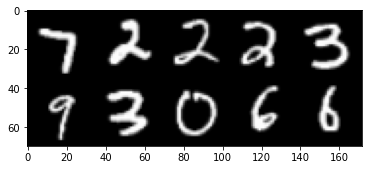

In [7]:
images, labels = next(iter(dloader))
show_tensor_images(images)

**GAN Component**

In [8]:
betas = (.9, .999)
n_channel = 1 if greyscale else 3
n_feature = 64
z_dim = 100
    
params = {'gen': {'n_feature': n_feature,
                  'n_channel': n_channel,
                  'lr': 1e-4,
                  'betas': betas},
          'disc': {'n_channel': n_channel,
                   'n_feature': n_feature,
                   'lr': 1e-4,
                   'betas': betas},
          'z_dim': z_dim,
          'n_conv_block': 2
         }

In [9]:
gan = DCGAN(params)
if os.path.exists(f'data/models/{gan_id}.pth'):
    print('RESUMING TRAINING...')
    gan.load_model(f'data/models/{gan_id}.pth')
else:
    print('NEW TRAINING...')

NEW TRAINING...


In [10]:
gan.generate_fake(1).shape

torch.Size([1, 1, 32, 32])

In [11]:
gan.init_tensorboard(main_dir='runs', subdir=gan_id, port=8008)

In [12]:
gan.train(n_epoch=10, dataloader=dloader, gan_id=False)

100%|██████████| 10/10 [03:15<00:00, 19.51s/it]


**RESULT**

In [13]:
import torch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


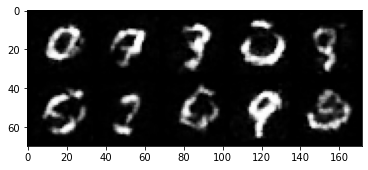

In [46]:
noise = gan.get_random_noise(10)

show_tensor_images(gan.generator(noise))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


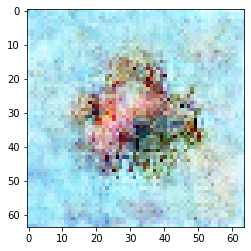

In [14]:
noise = gan.get_random_noise(1)
noise = torch.ones_like(noise)

noise[:, r] = v
show_tensor_images(gan.generator(noise))